## Data Scrapping from Twitter

In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stop = stopwords.words("english")
 
import warnings
warnings.filterwarnings('ignore')
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
consumer_key = 'WwzFApr0hzEcMlHqAsxN0qxrK'
consumer_secret = 'TU756bVsmWa9YtIEsKwdCAqnfeqKCo63KvHvQANoPXuPf3CVF4'
access_token = '1354374554-DTnvbTCT9gBqG17ZiLveimyOlhTfiYajJRCvgL8'
access_secret = 'QGnnrOnImC7c7ywQUKQhv9kNyKc31kecy3GaZdTNIMkEm'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [3]:
def get_users(twitterNewsChannels,NumberofTweet):
    """This function fetch users who retweet given News handle's tweets 
    
    Input: 
      TwitterNewsChannels - List of news channels' twitter handles
      NumberofTweet = int number of tweet to analyze on this twitter handle
    Return:
      DataFrame of Users ActiveNewsReaders, Popularity,Verified, TotalTweets
      """
    usersFromTweets = pd.DataFrame(columns = ["ActiveNewsReaders","Popularity", "Verified","totalTweets"])
    numberOfUsersMined = 0
    
    for newsChannel in twitterNewsChannels:
        for tweet in api.user_timeline(screen_name = newsChannel, count=NumberofTweet):
            for reTweet in api.retweets(tweet.id):
                
                usersFromTweets.loc[numberOfUsersMined, "ActiveNewsReaders"] = reTweet.user.screen_name
                
                if(reTweet.user.friends_count == 0):
                    usersFromTweets.loc[numberOfUsersMined, "Popularity"] = reTweet.user.followers_count
                else:
                    usersFromTweets.loc[numberOfUsersMined, "Popularity"] = reTweet.user.followers_count/reTweet.user.friends_count
                
                usersFromTweets.loc[numberOfUsersMined, "Verified"] = reTweet.user.verified
                usersFromTweets.loc[numberOfUsersMined, "totalTweets"] = reTweet.user.statuses_count
                
                numberOfUsersMined+=  1
                
                if numberOfUsersMined %100 ==0:
                  
                  time.sleep(6)
    return usersFromTweets

In [5]:
NewsChannelsUsernames = ["nytimes","business","washingtonpost"]
usersData = get_users(NewsChannelsUsernames,25)

KeyboardInterrupt: 

In [ ]:

usersData.head()

In [ ]:
# 1000 top users are the one which retwitted the tweet from this twitter handles
usersData.shape

(896, 4)

In [ ]:
# Most likly users might retwitted muliple tweets so, we removed the duplicates
usersData.drop_duplicates(inplace = True)
usersData.shape

(747, 4)

In [ ]:
usersData.Popularity.max()

1316.0

In [ ]:
# Filetered users with tweets > 10 and popularity 
usersData = usersData[(usersData.totalTweets > 10) & (usersData.Popularity > 1)]
usersData.shape

(228, 4)

In [ ]:
usersData = usersData.reset_index(drop=True)

In [ ]:
def getTweets(user):
    # Get Ten Tweets from the each user
    twitterUser = api.get_user(user)
    
    tweets = api.user_timeline(screen_name = user, count = 10,tweet_mode='extended')
    tentweets = []
    for tweet in tweets:
        if tweet.full_text.startswith("RT @") == True:
            tentweets.append(tweet.retweeted_status.full_text)
        else:
            tentweets.append(tweet.full_text)
       
    return tentweets

In [ ]:
vfunc = np.vectorize(getTweets)
usersData["tweets"] = usersData['ActiveNewsReaders'].apply(lambda x: getTweets(x))

In [ ]:
usersData.head(10)

,ActiveNewsReaders,Popularity,Verified,totalTweets,tweets
0,BillEsteem,1.00148,False,6223,[GAME 5 IS UNDERWAY!\n\n#BlueAndWhiteIgnite x ...
1,nyt_rt,29.5,False,14537,[Here's @aoscott's NYT movie review for “Aveng...
2,Septi_Rani,1.96889,False,1955,[[PIC] Nam Joo Hyuk untuk brand Sportswear 'Co...
3,tinuevel,1.41558,False,190198,[Here's @aoscott's NYT movie review for “Aveng...
4,james_khonkaen,2.67052,False,80062,[Here's @aoscott's NYT movie review for “Aveng...
5,deduped_nytimes,237.5,False,114223,[Navy SEALs say they repeatedly reported their...
6,sukachan810,40.5,False,120191,[おはようございます。\n2019/04/24水🌧🌧🌧\n\nさ、\n起きてコンビニ寄って今...
7,lee_knuth,1.95489,False,67761,[“I believe Congress should take the steps tow...
8,allgringo,1.63652,False,210377,[I'm here on the beautiful Golan Heights. All ...
9,albertosamanoc,1.12057,False,368,"[No niñas, algunos hombres nunca se arrepiente..."


In [ ]:
usersData.to_csv('USERSData.csv',index=None)

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving USERSData.csv to USERSData.csv


In [ ]:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "USERSData.csv" with length 509338 bytes


In [13]:
usersData = pd.read_csv('USERSData.csv')

In [14]:
usersData.head()

,ActiveNewsReaders,Popularity,Verified,totalTweets,tweets,ptweets
0,theReal_Rebel,2.451675,False,720228,['Are we ever going to lose the trope that ric...,ever go lose trope rich care poor kill one dea...
1,DavePOfficial,1.031140,False,134484,"['Sometimes I’m watching TV and I’m like, “are...",watch like are white now open four day straigh...
2,KathArevalo3,1.092857,False,16366,['Y cuántos episodio tendrá la última temporad...,la de got ya even brief here need know end day...
3,Christi46119463,1.829508,False,111472,['529 women ran for congress in 2018 — Meet fo...,woman ran congress meet four may moor wrote wo...
4,BKINDNBHAPPY,1.576606,False,6330,['In addition to the state ban on plastic bags...,state ban plastic bag fee paper bag begin next...


In [6]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
def processTweets(tweets):
    
    #cleaning of tweets
    cleanedTweets = []
    for tweet in tweets:
        tw = re.sub('http\S+', '', tweet) #remove links
        tw = re.sub('RT', '', tw) #remove RT of retweet
        tw = re.sub('@[^\s]+','',tw) #remove usernames 
        tw = "".join([char for char in tw if char not in string.punctuation]) #remove punctuations
        tw = tw.lower() #converting to lowercase letters
        tw = ' '.join([word for word in tw.split() if word not in (stop)]) #removing stop words
        tw = ' '.join([word for word in tw.split() if len(word)>2])
        cleanedTweets.append(tw)

    cleanedTweets = ' '.join(cleanedTweets) #joining all tweets
    
    #tokenization
    ProcessedTweets = word_tokenize(cleanedTweets)
    
    ProcessedTweets = [word for word in ProcessedTweets if len(word)>2]
    
    #stemming
    ProcessedTweets = [ps.stem(word) for word in ProcessedTweets]
    
    #lammitization
    ProcessedTweets = [wn.lemmatize(word) for word in ProcessedTweets]
    
    ProcessedTweets = ' '.join(w for w in ProcessedTweets if w in words)
    return ProcessedTweets
        

In [8]:
usersData["ptweets"] = usersData['tweets'].apply(lambda x : processTweets(x))

In [9]:
usersData.head(10)

,ActiveNewsReaders,Popularity,Verified,totalTweets,tweets,ptweets
0,theReal_Rebel,2.451675,False,720228,['Are we ever going to lose the trope that ric...,
1,DavePOfficial,1.031140,False,134484,"['Sometimes I’m watching TV and I’m like, “are...",
2,KathArevalo3,1.092857,False,16366,['Y cuántos episodio tendrá la última temporad...,
3,Christi46119463,1.829508,False,111472,['529 women ran for congress in 2018 — Meet fo...,
4,BKINDNBHAPPY,1.576606,False,6330,['In addition to the state ban on plastic bags...,
5,joleonbusby,11.135135,False,959418,['In case you missed it... Watch @Dee1Music te...,
6,lights_rage,1.370588,False,42442,"['Podcast: How to Tell if Your iPhone is New, ...",
7,mrmadillnews,7.363636,False,3364,['In addition to the state ban on plastic bags...,
8,DSongMarshall,1.052692,False,25502,['In addition to the state ban on plastic bags...,
9,VernaPolitics,2.411594,False,326811,['Everything you need to know about the #SriLa...,


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.1,
                                 use_idf=True)

In [16]:

tfidf_matrix = tfidf_vectorizer.fit_transform(usersData.ptweets)

In [17]:
tfidf_matrix

<242x117 sparse matrix of type '<class 'numpy.float64'>'
	with 4571 stored elements in Compressed Sparse Row format>

In [18]:
terms = tfidf_vectorizer.get_feature_names()

In [19]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.2870126 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.34737344, ..., 0.        , 0.14239371,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.13442327,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
feature_array = np.array(tfidf_vectorizer.get_feature_names())
tfidf_sorting = np.argsort(tfidf_matrix.toarray()).flatten()[::-1]

n = 15
top_n = feature_array[tfidf_sorting][:n]


In [21]:
top_n

array(['de', 'la', 'el', 'en', 'young', 'job', 'get', 'give', 'go',
       'good', 'got', 'hear', 'help', 'here', 'impeach'], dtype='<U8')

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [23]:
dist

array([[ 0.00000000e+00,  7.59173122e-01,  7.83745440e-01, ...,
         5.94696282e-01,  9.76296710e-01,  1.00000000e+00],
       [ 7.59173122e-01,  0.00000000e+00,  8.70229940e-01, ...,
         6.72229611e-01,  9.32453034e-01,  1.00000000e+00],
       [ 7.83745440e-01,  8.70229940e-01,  0.00000000e+00, ...,
         8.84528400e-01,  1.00000000e+00,  5.24064658e-01],
       ...,
       [ 5.94696282e-01,  6.72229611e-01,  8.84528400e-01, ...,
         0.00000000e+00,  8.00669921e-01,  1.00000000e+00],
       [ 9.76296710e-01,  9.32453034e-01,  1.00000000e+00, ...,
         8.00669921e-01, -4.44089210e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  5.24064658e-01, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [24]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names(), index = usersData.ActiveNewsReaders)

,also,ask,attack,back,big,break,call,candid,chang,come,...,way,white,without,woman,work,world,would,write,year,young
ActiveNewsReaders,,,,,,,,,,,,,,,,,,,,,
theReal_Rebel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.184837,0.161476,0.000000,0.000000,0.000000,0.287013,0.000000
DavePOfficial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.195458,0.000000,0.000000,0.177171,0.000000,0.000000,0.000000,0.000000,0.000000
KathArevalo3,0.000000,0.000000,0.347373,0.000000,0.197033,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142394,0.000000
Christi46119463,0.000000,0.132176,0.000000,0.000000,0.000000,0.000000,0.116332,0.000000,0.000000,0.000000,...,0.000000,0.367301,0.000000,0.381102,0.000000,0.000000,0.098000,0.000000,0.098629,0.000000
BKINDNBHAPPY,0.000000,0.000000,0.000000,0.000000,0.000000,0.213800,0.000000,0.000000,0.171917,0.000000,...,0.000000,0.000000,0.000000,0.192293,0.000000,0.374005,0.000000,0.000000,0.447885,0.000000
joleonbusby,0.000000,0.000000,0.261665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290504,0.214521,0.000000
lights_rage,0.000000,0.185965,0.000000,0.000000,0.000000,0.397441,0.163672,0.000000,0.319583,0.166403,...,0.175409,0.172258,0.000000,0.000000,0.000000,0.173813,0.000000,0.000000,0.138765,0.000000
mrmadillnews,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258793,0.000000
DSongMarshall,0.000000,0.000000,0.000000,0.394383,0.147839,0.000000,0.252037,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.133826,0.000000,0.000000,0.427366,0.000000


In [25]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [26]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 sri
 attack
 plan
 easter
 kill
 trump
 say
 day
 leader
 read
Cluster 1:
 make
 thank
 need
 via
 day
 new
 back
 million
 think
 nation
Cluster 2:
 one
 like
 want
 get
 would
 year
 say
 take
 see
 new
Cluster 3:
 de
 la
 en
 el
 un
 say
 world
 sri
 new
 day
Cluster 4:
 trump
 report
 impeach
 democrat
 say
 time
 new
 call
 hear
 woman


In [27]:
# Selecting Optimal K

 
# The kmeans algorithm is implemented in the scikits-learn library
from sklearn.cluster import KMeans

df_km_result=pd.DataFrame(columns=['k','Score'])
score =[]
kv =[]
for k in range (2, 30):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(tfidf_matrix)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    
    kv.append(k)
    score.append(interia)

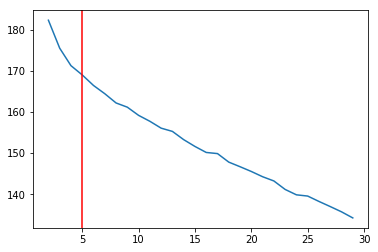

In [28]:
df_km_result['k'] =kv
df_km_result['Score'] = score
plt.plot(kv,score)
plt.axvline(5,color='red')

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


for eps in [0.5,1,2,3,4,5,6,7,8,9,10,11]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(tfidf_matrix)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(tfidf_matrix, db.labels_, metric='euclidean')))

0.5 1: 0.021887701753769025
1 1: 0.06859861320858182
1 2: 0.04882681760085803
1 3: 0.06806026450505369
1 4: 0.07313369172402287


In [30]:
from sklearn import metrics
db = DBSCAN(eps=1, min_samples=3).fit(tfidf_matrix)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_matrix, dbscanlabels))

Estimated number of clusters: 6
Silhouette Coefficient: 0.068


In [31]:

set(dbscanlabels)

{-1, 0, 1, 2, 3, 4, 5}

In [32]:
titles = usersData.ActiveNewsReaders

In [33]:
import os

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

In [34]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4'}

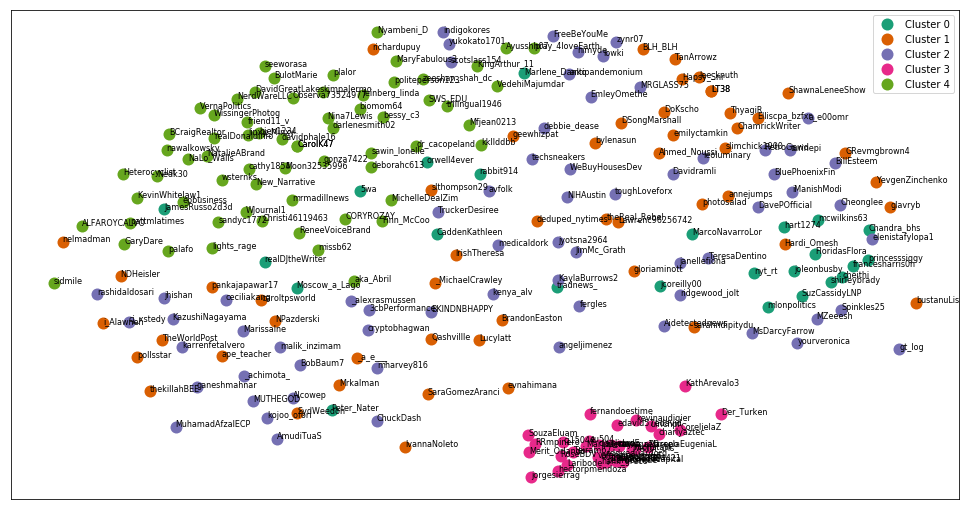

In [35]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles.values)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1) 
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show()
#plt.savefig('clusters_small_noaxes.png', dpi=200)

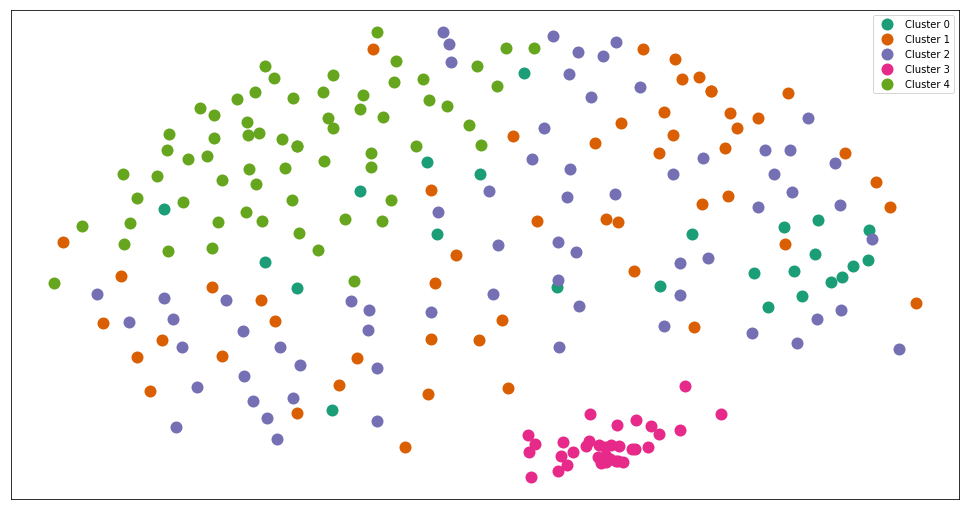

In [36]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles.values)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1) 


    
    
plt.show()
#plt.savefig('clusters_small_noaxes.png', dpi=200)

## Ward Clustering

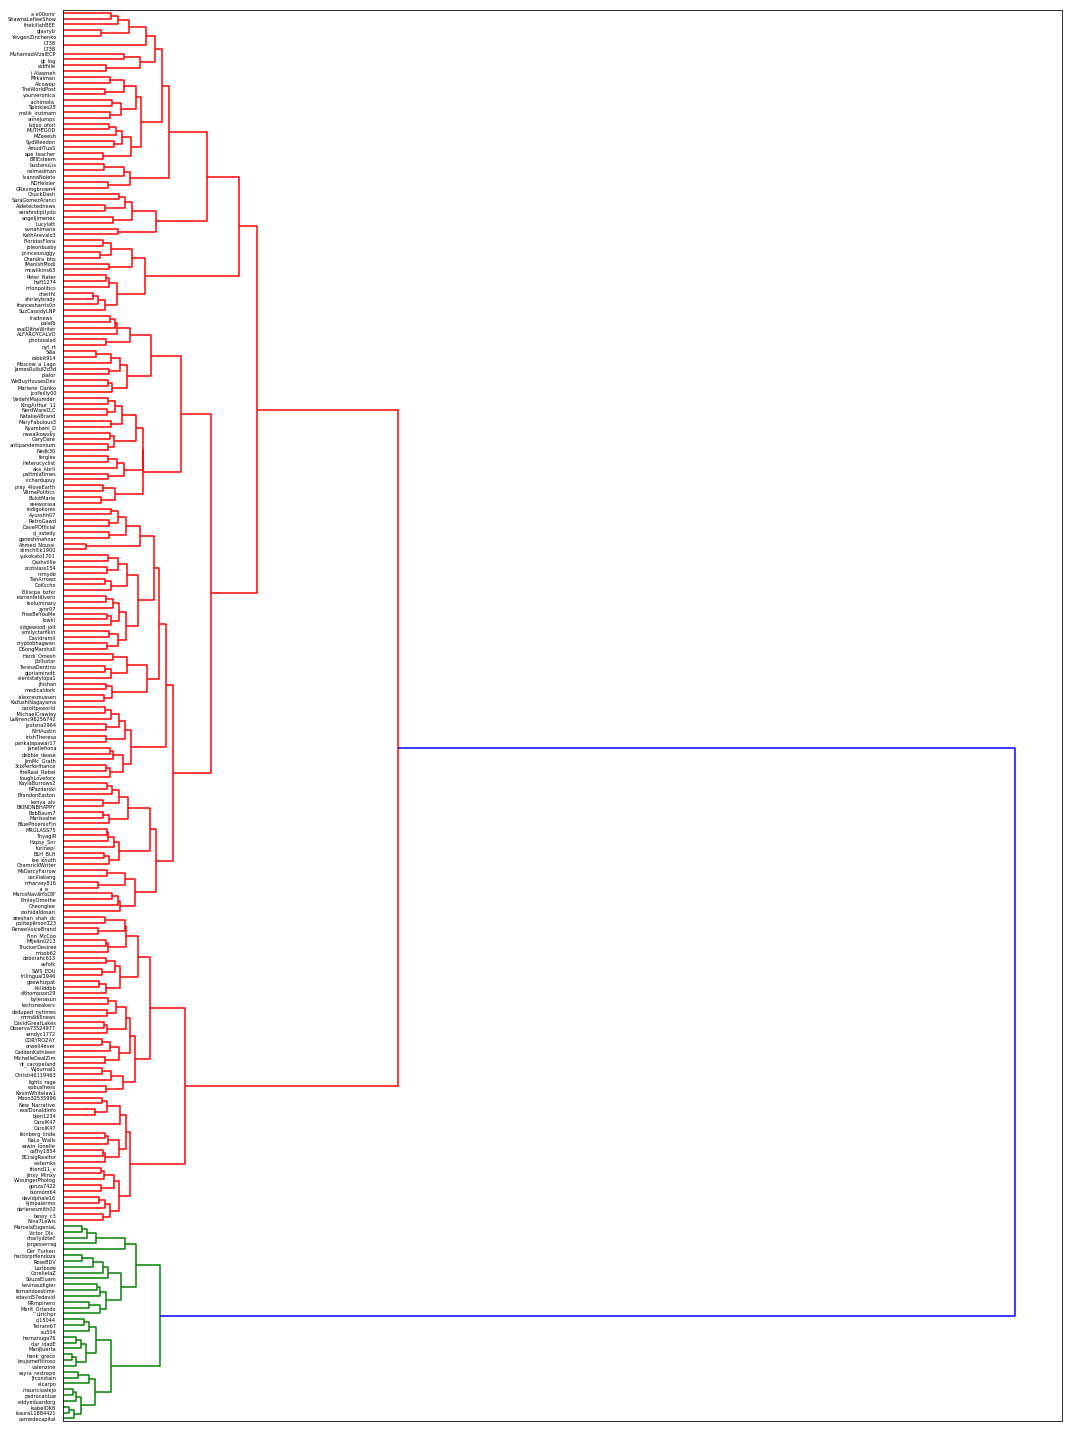

In [37]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles.values);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [38]:
#creating dataframe for tweets based on clustering results
usersData['cluster']=df.label


In [ ]:
!pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 17.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [39]:
# Import required packages
import logging
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

C:\Users\Lenovo\Anaconda3\envs\nlt\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [40]:
usersData.head()

,ActiveNewsReaders,Popularity,Verified,totalTweets,tweets,ptweets,cluster
0,theReal_Rebel,2.451675,False,720228,['Are we ever going to lose the trope that ric...,ever go lose trope rich care poor kill one dea...,1
1,DavePOfficial,1.031140,False,134484,"['Sometimes I’m watching TV and I’m like, “are...",watch like are white now open four day straigh...,2
2,KathArevalo3,1.092857,False,16366,['Y cuántos episodio tendrá la última temporad...,la de got ya even brief here need know end day...,3
3,Christi46119463,1.829508,False,111472,['529 women ran for congress in 2018 — Meet fo...,woman ran congress meet four may moor wrote wo...,4
4,BKINDNBHAPPY,1.576606,False,6330,['In addition to the state ban on plastic bags...,state ban plastic bag fee paper bag begin next...,2


In [39]:
len(array(usersData['ptweets']))

242

In [41]:
# I am cleaning it from scratch as I built this earlier and am using N-grams
from numpy import array
from nltk.corpus import stopwords 
from gensim.corpora.dictionary import Dictionary
import string
# Convert to array
docs =array(usersData['ptweets'])
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    #Remove stopwords
    docs = [[token for token in doc if token not in stop] for doc in docs]
    
    #Remove punctuation
    docs = [[token for token in doc if token not in exclude] for doc in docs]

    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
# Perform function on our document
docs = docs_preprocessor(docs)
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 320
Number of documents: 242
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 6), (30, 1), (31, 1), (32, 1), (33, 1)]]


In [42]:
usersData['corpus']=corpus
usersData['docs']=docs
#create unique list of names
UniqueNames = usersData['cluster'].unique()

#create a data frame dictionary to store data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
docscluster={elem : pd.DataFrame for elem in UniqueNames}
corpuscluster={elem : pd.DataFrame for elem in UniqueNames}
dictionarycluster={elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = usersData[:][usersData.cluster == key]
    docscluster[key]=usersData['docs'][usersData.cluster == key]
    corpuscluster[key]=usersData['corpus'][usersData.cluster == key]
    dictionarycluster[key]=Dictionary(docscluster[key])

In [43]:
os.environ['PATH'] += ":/usr/local/go/bin"

In [44]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:\\users\\Lenovo\\AppData\\Local\\Temp\\mallet-2.0.8'

mallet_path = 'C:\\users\\Lenovo\\AppData\\Local\\Temp\\mallet-2.0.8\\bin\\mallet'
ldamallet = LdaMallet(mallet_path,corpus=corpus,id2word=dictionary,iterations=30)
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#mallet_path = "/mallet-2.0.8/bin/mallet" # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=26, id2word=dictionary)

In [45]:
import pprint
# Show Topics
#pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.3193428281160888


In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:ocs
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [47]:
model_list={elem : pd.DataFrame for elem in UniqueNames }
coherence_values={ elem : pd.DataFrame for elem in UniqueNames}
for i in np.arange(num_clusters):
    model_list[i], coherence_values[i] = compute_coherence_values(dictionary=dictionarycluster[i], corpus=corpuscluster[i], texts=docscluster[i], start=2, limit=6, step=1)

In [48]:
# Print the coherence scores
import math
best_value=np.array([])
optimal_model={elem : pd.DataFrame for elem in UniqueNames }
for i in np.arange(num_clusters):
    coherence_values[i]=[value for value in coherence_values[i] if not math.isnan(value)]
    best_value=np.append(best_value, np.amax(coherence_values[i])) 
    t=int(np.argmax(coherence_values[i]))
    optimal_model[i]=model_list[i][t]
    print(t)
    #print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

1
1
0
0
1


In [49]:
coherence_values

{1: [0.3678713616263618,
  0.4272237313904827,
  0.39048825313559343,
  0.39056582346485624],
 2: [0.5408115879641322,
  0.519217599994347,
  0.5227223504826379,
  0.478231130550236],
 3: [0.6519933315733226,
  0.6275364745928904,
  0.6338824708583294,
  0.6419408003249354],
 4: [0.39688580312039073,
  0.47290820061248423,
  0.46204265492208074,
  0.46296691905221926],
 0: [0.5587818605209938,
  0.5950992064053237,
  0.5777535342419807,
  0.5391496430482267]}

In [50]:
optimal_model[i].print_topics(num_words=4)

[(0, '0.036*"analyst" + 0.033*"call" + 0.033*"beer" + 0.030*"respond"'),
 (1, '0.050*"play" + 0.035*"news" + 0.032*"catch" + 0.032*"growth"'),
 (2, '0.055*"classroom" + 0.046*"brilliant" + 0.046*"mission" + 0.035*"jail"')]

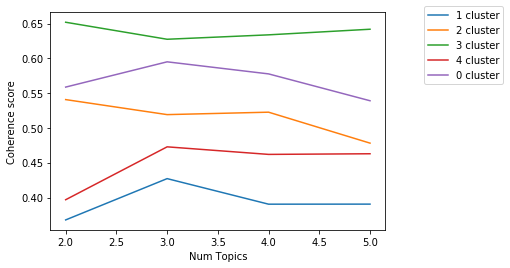

In [51]:
#x={elem:pd.DataFrame for elem in range(UniqueNames)}
import matplotlib.pyplot as plt
limit=6; start=2; step=1;
x={elem:list(range(start, limit, step)) for elem in (UniqueNames)}
for key in x.keys():
    plt.plot(x[key],coherence_values[key], label= str(key)+ ' cluster') 
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    
plt.legend(loc='best',bbox_to_anchor=(1.1, 1.05))
plt.show()

### This is the function to evaluate % of each topic from news articles

In [52]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
      # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


## Sentiment Analysis

In [53]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

In [54]:
polaritycluster={elem : pd.DataFrame for elem in UniqueNames}
subjectivitycluster={elem : pd.DataFrame for elem in UniqueNames}
for i in DataFrameDict.keys():
    polaritycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweets'])).sentiment.polarity
    subjectivitycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweets'])).sentiment.subjectivity


In [55]:
polaritycluster

{1: 0.12364994378208993,
 2: 0.11674395152631759,
 3: 0.061727113953910374,
 4: 0.08522135740490171,
 0: 0.05722877757239255}

In [56]:
subjectivitycluster

{1: 0.470103595402198,
 2: 0.46632084405893887,
 3: 0.45692446276278614,
 4: 0.44770781609389165,
 0: 0.4407437450256602}

In [57]:
lda_model2 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model[0])

In [58]:
 #Visualize the topics
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(lda_model2, corpuscluster[0], dictionarycluster[0])
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.000857 -0.000056       1        1  34.778518
1      0.000484 -0.000622       2        1  32.760668
2      0.000373  0.000678       3        1  32.460813, topic_info=    Category      Freq        Term     Total  loglift  logprob
459  Default  1.000000       creed  1.000000  30.0000  30.0000
212  Default  1.000000        care  1.000000  29.0000  29.0000
55   Default  1.000000       break  1.000000  28.0000  28.0000
687  Default  0.000000       treat  0.000000  27.0000  27.0000
755  Default  0.000000       screw  0.000000  26.0000  26.0000
495  Default  0.000000        halt  0.000000  25.0000  25.0000
343  Default  1.000000     someday  1.000000  24.0000  24.0000
105  Default  1.000000       ahead  1.000000  23.0000  23.0000
621  Default  0.000000      prayer  0.000000  22.0000  22.0000
265  Default  0.000000        grow  0.000000  21.0000  21.0000
147  Default  1.000000       juror  1.000000  20.0000  20.0000
453  Default  1.000000     younger  1.000000  19.0000  19.0000
541  Default  0.000000  commission  0.000000  18.0000  18.0000
231  Default  0.000000       liter  0.000000  17.0000  17.0000
393  Default  0.000000       wound  0.000000  16.0000  16.0000
113  Default  0.000000      govern  0.000000  15.0000  15.0000
337  Default  1.000000     million  1.000000  14.0000  14.0000
637  Default  1.000000        bias  1.000000  13.0000  13.0000
604  Default  1.000000        duke  1.000000  12.0000  12.0000
692  Default  1.000000        void  1.000000  11.0000  11.0000
636  Default  1.000000    attorney  1.000000  10.0000  10.0000
120  Default  1.000000    question  1.000000   9.0000   9.0000
257  Default  0.000000        cite  0.000000   8.0000   8.0000
256  Default  1.000000       check  1.000000   7.0000   7.0000
0    Default  1.000000      annual  1.000000   6.0000   6.0000
363  Default  0.000000    distress  0.000000   5.0000   5.0000
138  Default  0.000000        fail  0.000000   4.0000   4.0000
355  Default  1.000000     blunder  1.000000   3.0000   3.0000
467  Default  0.000000       fight  0.000000   2.0000   2.0000
466  Default  1.000000        feel  1.000000   1.0000   1.0000
..       ...       ...         ...       ...      ...      ...
466   Topic3  0.398217        feel  1.083680   0.1240  -6.4263
205   Topic3  0.329932       video  0.898597   0.1232  -6.6144
483   Topic3  0.381558       speed  1.040681   0.1218  -6.4690
701   Topic3  0.377970        jack  1.032188   0.1205  -6.4785
453   Topic3  0.392216     younger  1.072139   0.1195  -6.4415
762   Topic3  0.361376        wise  0.990049   0.1173  -6.5234
288   Topic3  0.355502      thread  0.976028   0.1152  -6.5398
611   Topic3  0.366677    meatless  1.008598   0.1133  -6.5088
472   Topic3  0.362399        onto  0.998841   0.1113  -6.5206
26    Topic3  0.352188      number  0.971351   0.1106  -6.5491
286   Topic3  0.370385        talk  1.022052   0.1101  -6.4988
247   Topic3  0.374029   treatment  1.034183   0.1081  -6.4890
399   Topic3  0.381147        bold  1.054402   0.1076  -6.4701
81    Topic3  0.375788       sever  1.041882   0.1054  -6.4843
422   Topic3  0.344010      result  0.953872   0.1053  -6.5726
284   Topic3  0.352195       squad  0.976679   0.1052  -6.5491
87    Topic3  0.404235        snap  1.121140   0.1050  -6.4113
311   Topic3  0.377139       stand  1.048660   0.1025  -6.4807
676   Topic3  0.385190      invest  1.072298   0.1013  -6.4596
688   Topic3  0.377292    undercut  1.055077   0.0968  -6.4803
53    Topic3  0.379316        best  1.065348   0.0925  -6.4749
230   Topic3  0.374568      leader  1.053895   0.0907  -6.4875
40    Topic3  0.374456       today  1.059291   0.0853  -6.4878
120   Topic3  0.379768    question  1.088905   0.0718  -6.4737
398   Topic3  0.372625      attend  1.063078   0.0768  -6.4927
143   Topic3  0.376018        heed  1.089981   0.0609  -6.4837
594   Topic3  0.374881       birt

In [74]:
pyLDAvis.save_html(vis2, 'lda.html') #save the visualization

In [59]:
optimal_model[3].train(corpus)

## Scaping nytimes

In [60]:
import newspaper
from newspaper import Article

In [75]:
cnn_paper = newspaper.build('https://www.nytimes.com')


C:\Users\Lenovo\Anaconda3\envs\nlt\lib\site-packages\requests\utils.py:439: DeprecationWarning: In requests 3.0, get_encodings_from_content will be removed. For more information, please see the discussion on issue #2266. (This warning should only appear once.)
  DeprecationWarning)


In [76]:
url="https://www.foxnews.com/world/sri-lanka-church-hotel-massacre-victims-tv-chef-mother-son-americans"
article = Article(url)

In [77]:
import pandas as pd
cnn_articles=pd.DataFrame()
df_text = pd.DataFrame(columns=['Link','text'])
for article in cnn_paper.articles:
    link = article.url
    try:
        
        article.download()
        article.parse()
        article.nlp()
        article.text
        temp={'Link':link,
              'text':article.text}
        df_text= df_text.append(temp,ignore_index=True)
        
    except:
        pass
    
           
    

Building prefix dict from C:\Users\Lenovo\Anaconda3\envs\nlt\lib\site-packages\jieba\dict.txt ...
Dumping model to file cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.9269981384277344 seconds.
Prefix dict has been built succesfully.


In [78]:
# Perform function on our document
docs = docs_preprocessor(df_text['text'])
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))


Number of unique tokens: 164
Number of documents: 123


In [79]:
pol=[TextBlob(' '.join(df_text.iloc[i,1])).sentiment.polarity for i in range(df_text.shape[0])]
sub=[TextBlob(' '.join(df_text.iloc[i,1])).sentiment.subjectivity for i in range(df_text.shape[0])]
df_text['pol']=pol
df_text['sub']=sub

In [80]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
      # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [81]:
df_topic_sents_keywords={elem : pd.DataFrame for elem in UniqueNames}
topicss=pd.DataFrame()
for i in range(len(UniqueNames)):
    mod=gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model[i])
    temp={'cluster':i,
         'model':mod}
    topicss=topicss.append(temp, ignore_index=True)
    df_topic_sents_keywords[i] = format_topics_sentences(ldamodel=mod, corpus=corpus, texts=docs)
    df_topic_sents_keywords[i]['Diff']= df_topic_sents_keywords[i]['Perc_Contribution']-np.mean(df_topic_sents_keywords[i]['Perc_Contribution'])
   

In [82]:
df_topic_sents_keywords

{1:      Dominant_Topic  Perc_Contribution  \
 0               2.0             0.3949   
 1               0.0             0.3689   
 2               2.0             0.3601   
 3               0.0             0.3822   
 4               2.0             0.3761   
 5               0.0             0.3698   
 6               2.0             0.3589   
 7               2.0             0.3785   
 8               0.0             0.3574   
 9               2.0             0.3516   
 10              2.0             0.3516   
 11              2.0             0.3789   
 12              2.0             0.3789   
 13              1.0             0.3895   
 14              1.0             0.3895   
 15              0.0             0.4220   
 16              2.0             0.3489   
 17              2.0             0.3489   
 18              2.0             0.3990   
 19              2.0             0.3990   
 20              0.0             0.3570   
 21              2.0             0.4233   
 22     

In [83]:
from sklearn.metrics.pairwise import cosine_similarity
sentiment={elem: pd.DataFrame for elem in UniqueNames}
subjectivit={elem: pd.DataFrame for elem in UniqueNames}
w1=0.8
w2=0.2
for i in range(len(UniqueNames)):
    sentiment[i]=cosine_similarity(np.array(df_text.iloc[:, 2]).reshape(-1, 1),np.array([polaritycluster[i]]).reshape(-1, 1))
    subjectivit[i]=cosine_similarity(np.array(df_text.iloc[:, 2]).reshape(-1, 1),np.array([subjectivitycluster[i]]).reshape(-1, 1))
    df_topic_sents_keywords[i]['Polarity']=sentiment[i]
    df_topic_sents_keywords[i]['Subjectivity']=subjectivit[i]
    df_topic_sents_keywords[i]['Metric']=w1*df_topic_sents_keywords[i]['Diff']+w2/2*(df_topic_sents_keywords[i]['Polarity']+df_topic_sents_keywords[i]['Subjectivity'])


In [84]:
 df_topic_sents_keywords

{1:      Dominant_Topic  Perc_Contribution  \
 0               2.0             0.3949   
 1               0.0             0.3689   
 2               2.0             0.3601   
 3               0.0             0.3822   
 4               2.0             0.3761   
 5               0.0             0.3698   
 6               2.0             0.3589   
 7               2.0             0.3785   
 8               0.0             0.3574   
 9               2.0             0.3516   
 10              2.0             0.3516   
 11              2.0             0.3789   
 12              2.0             0.3789   
 13              1.0             0.3895   
 14              1.0             0.3895   
 15              0.0             0.4220   
 16              2.0             0.3489   
 17              2.0             0.3489   
 18              2.0             0.3990   
 19              2.0             0.3990   
 20              0.0             0.3570   
 21              2.0             0.4233   
 22     

In [85]:
recommend=pd.DataFrame()
metric_value=pd.DataFrame()
rec=np.array([])
for i in range(len(docs)):
    for j in range(len(UniqueNames)):
        rec=np.append(rec, df_topic_sents_keywords[j].iloc[i,7])
        
    recommend=recommend.append(pd.Series(np.argmax(rec)),ignore_index=True)
    metric_value=metric_value.append(pd.Series(np.amax(rec)),ignore_index=True)
    rec=np.array([])


In [86]:
recommend['metric']=metric_value
recommend['url']=df_text['Link']

#np.array([recommend,metric_value])
recommend #0 is cluster group


,0,metric,url
0,1.0,0.224501,https://www.nytimes.com/2019/04/23/podcasts/th...
1,0.0,0.273117,https://www.nytimes.com/2019/04/23/business/be...
2,3.0,0.219307,https://www.nytimes.com/2019/04/19/books/revie...
3,1.0,-0.185659,https://www.nytimes.com/2019/04/23/world/asia/...
4,4.0,-0.184745,https://www.nytimes.com/2019/04/23/world/asia/...
5,3.0,0.223467,https://www.nytimes.com/2019/04/23/world/asia/...
6,4.0,-0.171705,https://www.nytimes.com/2019/04/23/us/politics...
7,0.0,0.245437,https://www.nytimes.com/2019/04/23/us/politics...
8,0.0,0.225597,https://www.nytimes.com/2019/04/23/us/politics...
9,3.0,-0.157413,https://www.nytimes.com/2019/04/23/us/navy-sea...


In [87]:
df_text

,Link,text,pol,sub
0,https://www.nytimes.com/2019/04/23/podcasts/th...,"[problems, at, a, plane, factory, in, south, c...",0.066273,0.444817
1,https://www.nytimes.com/2019/04/23/business/be...,"[beautiful, women, sail, through, life, with, ...",0.207051,0.540980
2,https://www.nytimes.com/2019/04/19/books/revie...,"[subscribe, itunes, google, play, music, how, ...",0.085000,0.555000
3,https://www.nytimes.com/2019/04/23/world/asia/...,"[colombo, sri, lanka, the, islamic, state, cla...",-0.052604,0.350000
4,https://www.nytimes.com/2019/04/23/world/asia/...,"[the, islamic, state, has, claimed, responsibi...",-0.014583,0.286574
5,https://www.nytimes.com/2019/04/23/world/asia/...,"[negombo, sri, lanka, the, coffins, came, one,...",0.094444,0.508889
6,https://www.nytimes.com/2019/04/23/us/politics...,"[washington, president, trump, has, been, cons...",-0.067013,0.473506
7,https://www.nytimes.com/2019/04/23/us/politics...,"[washington, the, report, by, robert, s, muell...",0.050893,0.569345
8,https://www.nytimes.com/2019/04/23/us/politics...,"[washington, president, trump, s, administrati...",0.026471,0.133824
9,https://www.nytimes.com/2019/04/23/us/navy-sea...,"[the, clear, message, one, of, the, seven, tol...",-0.043122,0.370899
